<h1>Individual Planning Report</h1>
The players.csv file lists all unique players using the MineCraft server using data collected by recording play sessions. There are 196 observations and 7 variables describing data about each individual player. The first variable “experience” uses characters to describe how long the individual has been playing the game: Beginner, Amateur, Regular, Veteran, or Pro. The second variable is “subscribe”, using logicals true or false to describe whether or not the player is a subscriber. The third variable is “hashedEmail”, showing the hashed email of all the players using characters. The fourth variable “played_hours” describes the amount of hours the individual has played using doubles. The fifth variable is “name”, describing the name of the player using characters. The sixth variable “gender” uses characters to describe whether the player is male or female. Finally, the seventh variable “Age” uses doubles to list the age of the player. The data is already tidy as each row is one observation, each column is one variable, and each cell contains a single value. The only potential issue that can be observed is that the play time for many players are given as 0.0, even though their experience indicates that they are regulars or veterans. This can lead to confusion in interpretability and analysis. <br> <br>

This project will address the broad question: which “kinds” of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts? More specifically: can the age of the player predict the amount of played hours in the Players dataset? To do so, K-nearest-neighbours regression will be used to predict numerical values for hours played based on the variable age. Data will be split 75:25 into a training set and testing set before standardizing the data. These sets will consist of variables played_hours and Age. The training set will be used to predict numerical values for hours played and predictive accuracy will be assessed using the test data. Cross validation will be performed to determine the best k that gives us the smallest RMSPE. This method is done assuming that there is in fact a non-linear relationship between age and hours played. One limitation is that the model may not predict well beyond the range of values in the training data. Additionally, it might become very slow if the training data is too large. 

In [1]:
library(tidyverse)
players <- read_csv("players.csv")
#data is already tidy and does not need to be wrangled. 

played_hours_mean <- summarize(players, mean(played_hours, na.rm = TRUE))
played_hours_mean

Age_mean <- summarize(players, mean(Age, na.rm = TRUE))
Age_mean

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


"mean(played_hours, na.rm = TRUE)"
<dbl>
5.845918


"mean(Age, na.rm = TRUE)"
<dbl>
20.52062


| Variable | Mean |
| ----- | -----|
|played_hours| 5.845918|
|Age|20.52062|

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


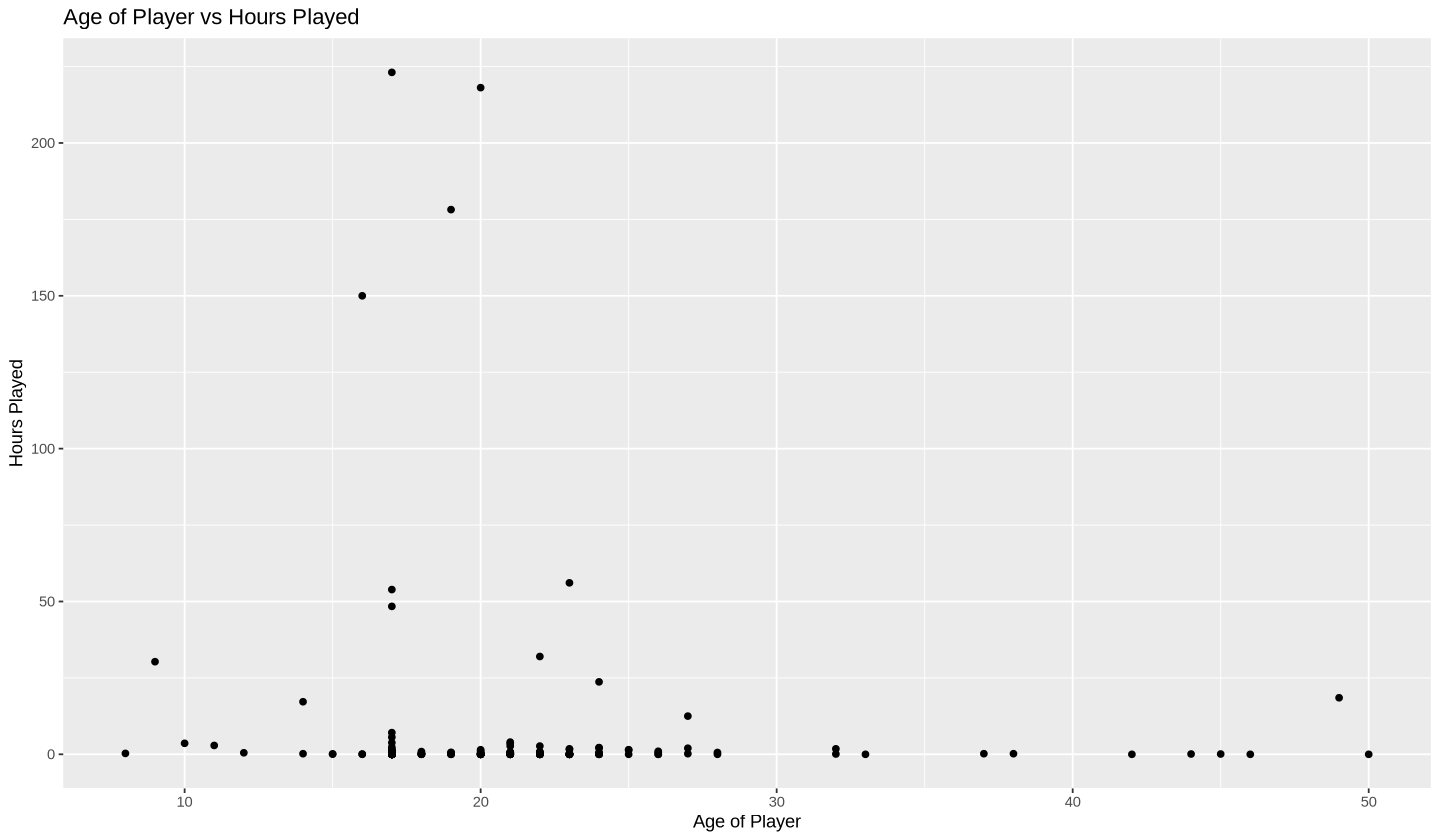

In [4]:
options(repr.plot.width = 12, repr.plot.height = 7)
age_vs_played_hours <- players|>
ggplot(aes(x=Age, y=played_hours))+
geom_point()+
labs(x="Age of Player", y="Hours Played")+
ggtitle("Age of Player vs Hours Played")
age_vs_played_hours

We can see that most of the hours played range between 0 and 50, with some outliers in the 150-250 range. These higher times are associated with players aged ~15-20. The number of hours for those aged 30 to 50 are very low, near zero, indicating that most people in this age range do not spend much time playing the game. However, the data points are more clustered as well as higher for ages 15-25, showing more popularity in this age range. Overall, the plot shows that younger players are more likely to spend more time on the game while older players above 30 do not spend as much time, indicating that there is a relationship between the two variables investigated. 